In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("Interactive Dashboards Start.xlsx")
data.head()

,Invoice Date,Invoice ID,Customer Type,Customer Name,City,Customer Gender,Employee Name,Manager Name,Product Name,Product Category,Channel,Customer Satisfaction,Total Sales
0,2021-06-19,ID-355796,Loyal Customer,Hala Ahmed,Hafar Al Batin,Female,Ayman Kamal,Hany Higazi,Backseat Car Organizer,Automotive,Store,Ok,56
1,2020-02-18,ID-394350,Loyal Customer,Ahmed Yousef,Riyadh,Male,Sara Adel,Hany Higazi,Micro Sd-Memory-Card,Electronics,OnLine,Very Low,1175
2,2022-09-21,ID-80295,Retail Customer,Hassan Abdelrahman,Riyadh,Male,Abdullateif AlKhateib,Mohamed Allam,Bowls Feeder,Pet Supplies,OnLine,Very Low,305
3,2020-09-14,ID-284815,Loyal Customer,Taleb Aldris,Najran,Male,Mohamed Musallam,Mohamed Allam,Hooded Shirt Jacket,Men'S Fashion,Store,Ok,104
4,2022-05-14,ID-210187,Loyal Customer,Amal Mohamed,Riyadh,Female,Alaa Khalifa,Hany Higazi,Toddler Little Boy,Boys' Fashion,Store,High,294


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice Date           49998 non-null  datetime64[ns]
 1   Invoice ID             49998 non-null  object        
 2   Customer Type          49998 non-null  object        
 3   Customer Name          49998 non-null  object        
 4   City                   49998 non-null  object        
 5   Customer Gender        49998 non-null  object        
 6   Employee Name          49998 non-null  object        
 7   Manager Name           49998 non-null  object        
 8   Product Name           49998 non-null  object        
 9   Product Category       49998 non-null  object        
 10  Channel                49998 non-null  object        
 11  Customer Satisfaction  49998 non-null  object        
 12  Total Sales            49998 non-null  int64         
dtypes

In [4]:
# Month wise sales
month=data['Invoice Date'].dt.month
monthly_sales=data.groupby(month)['Total Sales'].sum().sort_values()
monthly_sales

Invoice Date
2     7900721
11    7934889
5     7946136
6     7967462
10    8142282
9     8171249
1     8186242
3     8239340
4     8372743
8     8496703
7     8575025
12    8719201
Name: Total Sales, dtype: int64

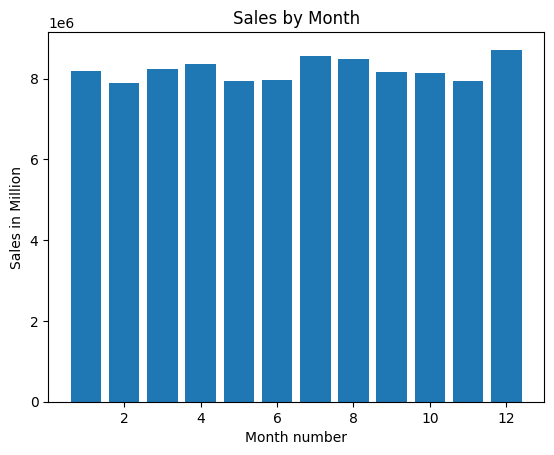

In [5]:
plt.bar(x=monthly_sales.index,height=monthly_sales.values,data=data)
plt.xlabel("Month number")
plt.ylabel("Sales in Million")
plt.title("Sales by Month")
plt.show()

In [6]:
# Most selling day
day=data['Invoice Date'].dt.day_name()
daily_sales=data.groupby(day)['Total Sales'].sum().sort_values()
daily_sales

Invoice Date
Wednesday    13875897
Monday       13926731
Tuesday      13958332
Sunday       14124074
Saturday     14130664
Friday       14313550
Thursday     14322745
Name: Total Sales, dtype: int64

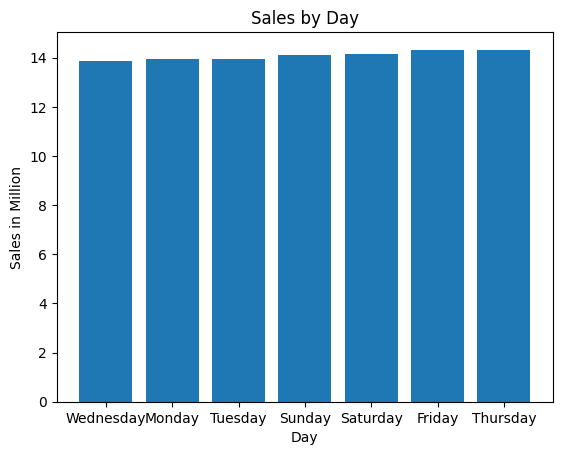

In [7]:
plt.bar(x=daily_sales.index,height=daily_sales.values/1000000,data=data)
plt.xlabel("Day")
plt.ylabel("Sales in Million")
plt.title("Sales by Day")
plt.show()

In [8]:
# Most selling year
year=data['Invoice Date'].dt.year
yearly_sales=data.groupby(year)['Total Sales'].sum()
yearly_sales

Invoice Date
2020    24528114
2021    24385019
2022    25015491
2023    24723369
Name: Total Sales, dtype: int64

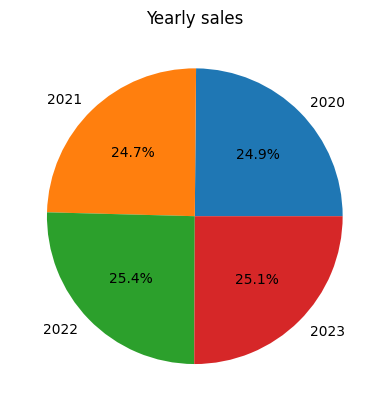

In [9]:
# creating pie chart for yearly sales
plt.pie(labels=yearly_sales.index,x=yearly_sales.values,autopct="%1.1f%%")
plt.title("Yearly sales")
plt.show()

In [10]:
# From which city most of the revenue is generated.
city_wise_sales=data.groupby('City')['Total Sales'].sum().sort_values(ascending=False)
city_wise_sales

City
Riyadh             13532286
Tabuk              10936015
Medina             10881898
Buraydah           10325348
Jeddah              8947467
Hafar Al Batin      8339067
Mecca               7750705
Wadi ad Dawasir     6651919
Arar                6538537
Najran              5936949
Al Khobar           5715607
AlUla               3096195
Name: Total Sales, dtype: int64

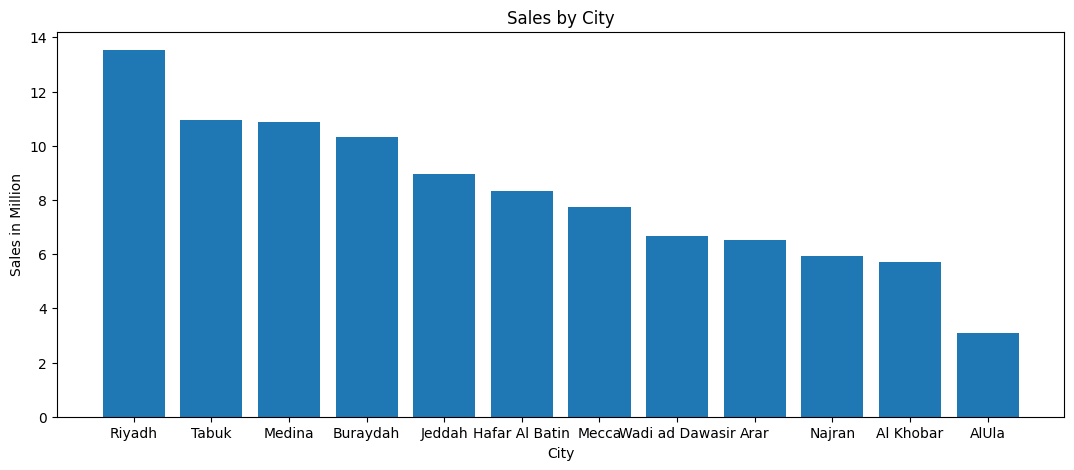

In [11]:
plt.figure(figsize=(13,5))
plt.bar(x=city_wise_sales.index,height=city_wise_sales.values/1000000,data=city_wise_sales)
plt.xlabel("City")
plt.ylabel("Sales in Million")
plt.title("Sales by City")
plt.show()

In [12]:
# Which are the most revenue generating products, enlist top 5?
unique_products=data['Product Name'].nunique()
top_products=data.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False).head()
top_products

Product Name
Water-Resistant Hooded    2014981
Original Fit Jeans        1985893
Heavyweight Jacket        1894368
Half Zip Pullover         1767057
Laptop Backpack           1729790
Name: Total Sales, dtype: int64

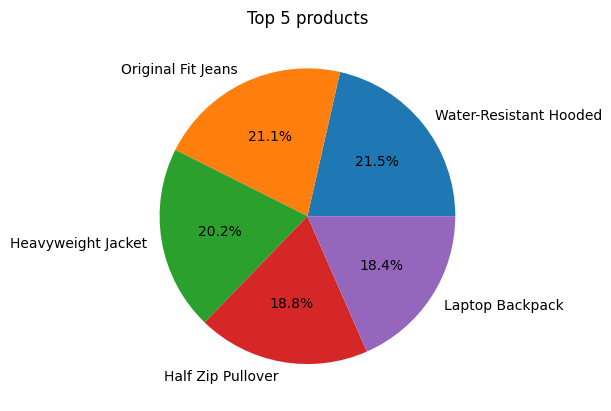

In [13]:
# creating pie chart for top products
plt.pie(labels=top_products.index,x=top_products.values,autopct="%1.1f%%")
plt.title("Top 5 products")
plt.show()

In [44]:
# Which gender makes more orders
gender_wise_orders=data['Customer Gender'].value_counts()
gender_wise_orders

Customer Gender
Male      27353
Female    22645
Name: count, dtype: int64

In [43]:
# The no of orders received by each employee
employee_orders=data['Employee Name'].value_counts()
employee_orders

Employee Name
Abdullateif AlKhateib    9401
Alaa Khalifa             9224
Ayman Kamal              8305
Yasmina Fouad            8244
Mohamed Musallam         7680
Sara Adel                7144
Name: count, dtype: int64

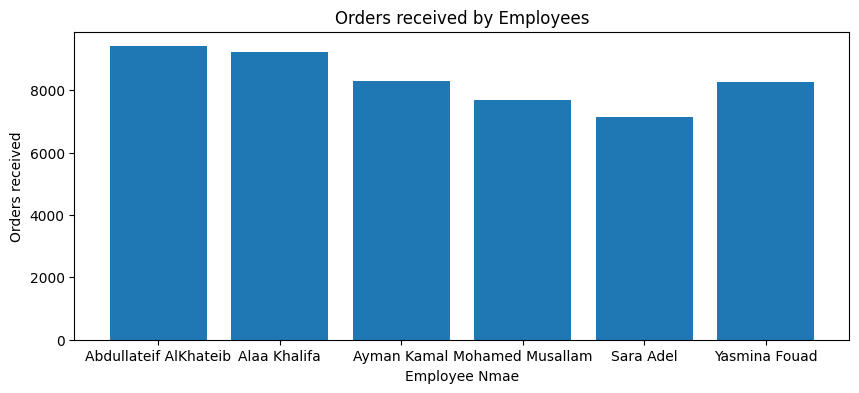

In [16]:
plt.figure(figsize=(10,4))
plt.bar(x=employee_orders.index,height=employee_orders.values)
plt.xlabel("Employee Nmae")
plt.ylabel("Orders received")
plt.title("Orders received by Employees")
plt.show()

In [17]:
# Revenue generated from each product category
product_categories=data['Product Category'].nunique()
category_wise_sales=data.groupby("Product Category")['Total Sales'].sum()
category_wise_sales

Product Category
Automotive                   7289194
Beauty And Personal Care    10249692
Boys' Fashion               11524520
Electronics                  7746544
Girls' Fashion              11971802
Luggage                      7343236
Men'S Fashion                9899636
Pet Supplies                 9791041
Toys And Games              10381033
Women'S Fashion             12455295
Name: Total Sales, dtype: int64

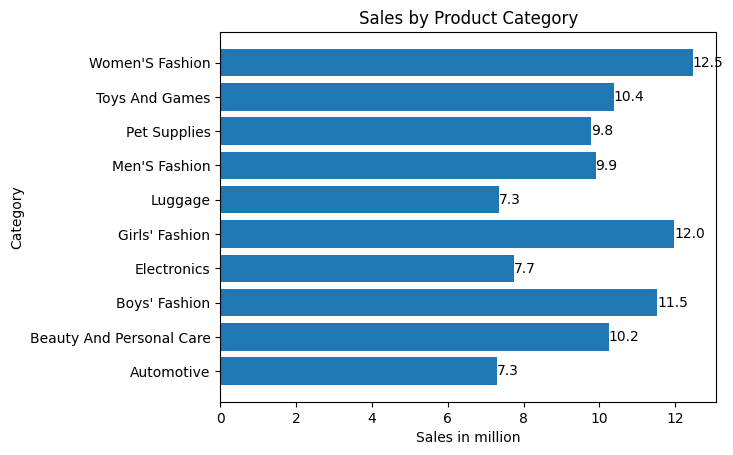

In [18]:
# visualization
bars=plt.barh(y=category_wise_sales.index,width=category_wise_sales.values/1000000)
plt.bar_label(bars, fmt='{:.1f}')
plt.xlabel("Sales in million")
plt.ylabel("Category")
plt.title("Sales by Product Category")
plt.show()

In [41]:
# What is the most common customer satisfication level?
average_satisfication=data['Customer Satisfaction'].value_counts()
average_satisfication

Customer Satisfaction
High         16783
Ok           13209
Very High     9930
Low           6779
Very Low      3297
Name: count, dtype: int64

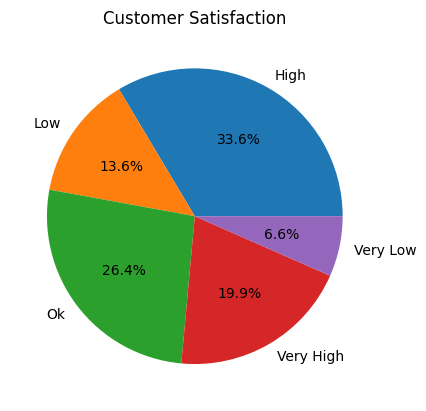

In [20]:
plt.title("Customer Satisfaction")
plt.pie(x=average_satisfication.values,labels=average_satisfication.index, autopct="%1.1f%%")
plt.show()

In [21]:
# 15.	For which product categories, the customer satisfactions is very high
very_high_satisfied_category=data[data['Customer Satisfaction']=='Very High'].groupby(["Product Category"])['Customer Satisfaction'].count()
very_high_satisfied_category=very_high_satisfied_category.sort_values(ascending=False).head(1)
very_high_satisfied_category

Product Category
Beauty And Personal Care    1126
Name: Customer Satisfaction, dtype: int64

In [22]:
# 16.	For which product categories, the customer satisfactions is very low.
very_low_satisfied_category=data[data['Customer Satisfaction']=='Very Low'].groupby(["Product Category"])['Customer Satisfaction'].count()
very_low_satisfied_category=very_low_satisfied_category.sort_values(ascending=False).head(1)
very_low_satisfied_category

Product Category
Women'S Fashion    355
Name: Customer Satisfaction, dtype: int64

In [39]:
# Most common customer type
customer_type=data['Customer Type'].value_counts()
customer_type

Customer Type
Loyal Customer     24865
Retail Customer    16739
New Customer        8394
Name: count, dtype: int64

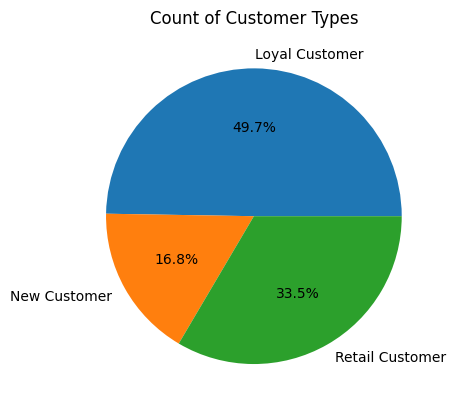

In [24]:
plt.title("Count of Customer Types")
plt.pie(x=customer_type.values,labels=customer_type.index, autopct="%1.1f%%")
plt.show()

In [25]:
# 21.	Revenue generated from each customer type.
customer_type_revenue=data.groupby("Customer Type")['Total Sales'].sum()
customer_type_revenue

Customer Type
Loyal Customer     49327207
New Customer       16427442
Retail Customer    32897344
Name: Total Sales, dtype: int64

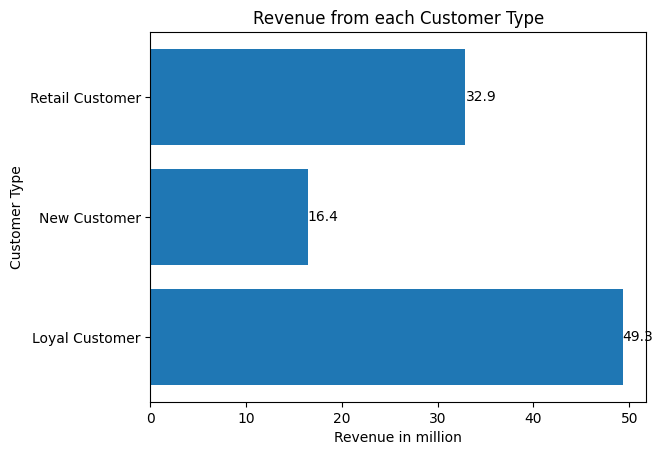

In [26]:
# visualization
bars=plt.barh(y=customer_type_revenue.index,width=customer_type_revenue.values/1000000)
plt.bar_label(bars, fmt='{:.1f}')
plt.xlabel("Revenue in million")
plt.ylabel("Customer Type")
plt.title("Revenue from each Customer Type")
plt.show()

In [ ]:
# In which city most and least of transactions occurred
city_wise_orders=data['City'].value_counts()

City
Riyadh             6901
Medina             5480
Tabuk              5429
Buraydah           5241
Jeddah             4548
Hafar Al Batin     4239
Mecca              3992
Wadi ad Dawasir    3420
Arar               3227
Najran             3020
Al Khobar          2920
AlUla              1581
Name: count, dtype: int64

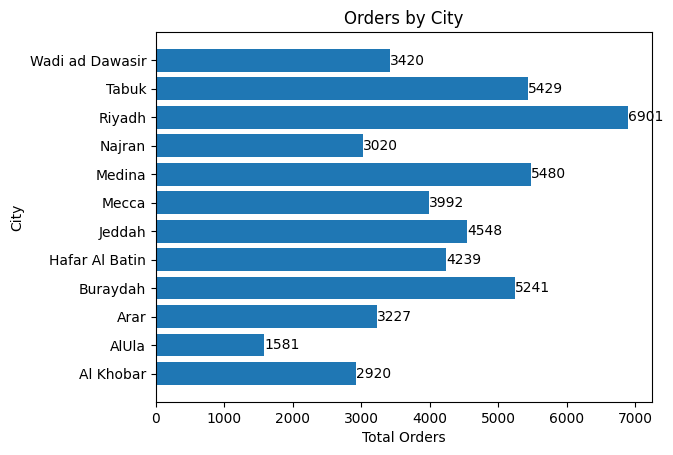

In [37]:
# visualization
bars=plt.barh(y=city_wise_orders.index,width=city_wise_orders.values)
plt.bar_label(bars)
plt.xlabel("Total Orders")
plt.ylabel("City")
plt.title("Orders by City")
plt.show()

In [34]:
data['City'].unique()

array(['Hafar Al Batin', 'Riyadh', 'Najran', 'AlUla', 'Buraydah',
       'Medina', 'Jeddah', 'Tabuk', 'Mecca', 'Al Khobar', 'Arar',
       'Wadi ad Dawasir'], dtype=object)

# Hypothesis Verification

In [47]:
# In mecca and medina, most of the sales will be from new customers.
customer_type_madina=data[(data['City']=='Medina') | (data['City']=='Mecca')].groupby('Customer Type')['Total Sales'].sum()
customer_type_madina

Customer Type
Loyal Customer     9496436
New Customer       3060940
Retail Customer    6075227
Name: Total Sales, dtype: int64

In [51]:
# In mecca and madina, most of the sales will be on Friday, due to most peoples try to visit holy cities for prayers.
daysale_madina=data[((data['City']=='Medina') | (data['City']=='Mecca')) & (data['Channel']=='Store')].groupby(day)['Total Sales'].sum()
daysale_madina.sort_values(ascending=False)

Invoice Date
Thursday     189928
Tuesday      183865
Sunday       182919
Wednesday    181836
Friday       176342
Monday       171922
Saturday     166124
Name: Total Sales, dtype: int64

In [ ]:
# Most of the sales will be from store due to being data from 2020-2022 which is not of very advanced world.
data['Channel'].value_counts()

Channel
OnLine    33242
Store     16756
Name: count, dtype: int64

# KPIs


In [31]:
data.columns

Index(['Invoice Date', 'Invoice ID', 'Customer Type', 'Customer Name', 'City',
       'Customer Gender', 'Employee Name', 'Manager Name', 'Product Name',
       'Product Category', 'Channel', 'Customer Satisfaction', 'Total Sales'],
      dtype='object')

In [33]:
total_customers=data['Customer Name'].nunique()
total_employees=data['Employee Name'].nunique()
total_managers=data['Manager Name'].nunique()
total_cities=data['City'].nunique()
total_products=data['Product Name'].nunique()
total_categories=data['Product Category'].nunique()
total_sales=data['Total Sales'].sum()
total_orders=data['Invoice ID'].count()
print(total_products)
print(total_categories)
print(total_cities)
print(total_customers)
print(total_employees)
print(total_managers)
print(total_orders)
print(total_sales)


100
10
12
26
6
2
49998
98651993
